<a href="https://colab.research.google.com/github/noramens/machine-learning-algorithms/blob/main/Multi_class_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image Classification using CNN

# Step 1. Load data directory from kaggle using API

In [1]:
#loading data from kaggle
import os
os.environ['KAGGLE_USERNAME'] = "noramens" # username from the json file
os.environ['KAGGLE_KEY'] = "1ae1a6ddbe406b287f5252e594e647ec" # key from the json file
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset # api copied from kaggle

 87% 117M/134M [00:00<00:00, 187MB/s] 
100% 134M/134M [00:00<00:00, 158MB/s]


In [2]:
# unzipping data
from zipfile import ZipFile

file_name = "/content/multiclass-weather-dataset.zip" # copy the file path

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


# Step 2. Exploratory data analysis

In [3]:
# we need to arrange the data so our keras module will know where to look for the data
import warnings
warnings.filterwarnings('ignore')

# Get all the paths
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)

# print(file_count)

['rainy', 'foggy', 'alien_test', 'cloudy', 'test.csv', 'shine', 'sunrise']


In [4]:
# Make new base directory
original_dataset_dir = '/content/dataset'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

#weather folder is empty because we just created it

In [5]:
#we first create a train and validation folder and under each folder we create five folders representing each of the type of weather

#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders 
# (cloud, folly, rainy, shine, sunrise)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

#Under validation folder create five folders 
# (cloud, folly, rainy, shine, sunrise)

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'foggy')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)

In [6]:
#this function helps us to split the data into the different folders created
# NB: you would have to run this function 5 times for the different types of weather


def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)


In [7]:
# a list of the directories that you are defining


CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather-data/train/shine/'
VALID_SHINE_DIR = '/content/weather-data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather-data/train/sunrise/'
VALID_SUNRISE_DIR = '/content/weather-data/validation/sunrise/'

In [8]:
# now the folders will be populated and made available in the folders we created


import os
import random
from shutil import copyfile

split_size = .85 # this means 85% of the data will come under the train folder and the remaining 15% will go to the validation folder

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

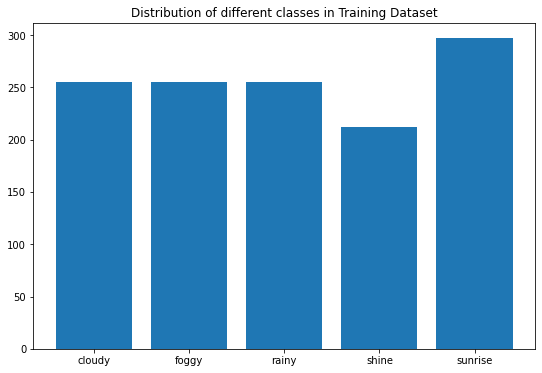

In [9]:
# to see how the differnt types of weather balance in our test dataset, we plot a bar plot

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [10]:
# the cart gives a rough estimation of the length of the different datasets in our test data. This checks the exact length in each type of weather

for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/train/'+i+'/'))))

Training cloudy images are: 255
Training foggy images are: 255
Training rainy images are: 255
Training shine images are: 212
Training sunrise images are: 297


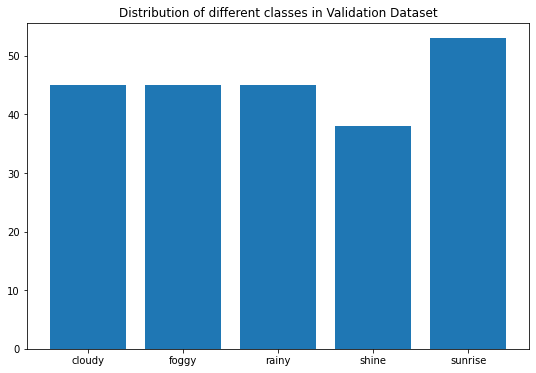

In [11]:
#this is for our validation data set. Also checking the length of data we have for the different types of weather

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [12]:
# the cart gives a rough estimation of the length of the different datasets in our validation data. This checks the exact length in each type of weather

for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/validation/'+i+'/'))))

Valid cloudy images are: 45
Valid foggy images are: 45
Valid rainy images are: 45
Valid shine images are: 38
Valid sunrise images are: 53


# Step 3. Deep Learning and Data Augmentation

In [13]:
# our various library import for deep learning and data augmentation

from tensorflow.keras.optimizers import Adam #for optimization
from tensorflow.keras.preprocessing.image import ImageDataGenerator #beacause we are going to use data augmentation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [14]:
# to give the data an equal size, we have to set a height and width

img_width=256; img_height=256
batch_size=16

In [15]:
# the reason we are doing data augmentation is that, because we have less data, we want to augment the data to create more
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0, # rescaling the data
                                   rotation_range=30, #creating a rotation. So we take each image it in a 30 degrees
                                   zoom_range=0.4,
                                   horizontal_flip=True) # meaning image will be rotated to the 90 degree

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

#results mean that when you sum up the all the items in the graph you will get the results

Found 1274 images belonging to 5 classes.


In [16]:
# repeating the same for the validation dataset, this is to validate to see how the model is doing
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )


Found 226 images belonging to 5 classes.


In [17]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [18]:
# we created a sequential model, under the sequenntial model, we created 16 neurons
#  Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2) - means we created a layer of 16 neurons/filter and each filter has a size of 3 by 3, after that we are applying a relu function
# and because it is the first layer we are applying a height and width of what each image will look like
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(), # we flatten because after that we are creating a fully connected network
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax') # at this last layer we have 5 because of our five different output (types of weather)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [19]:
# we are compiling the model using Adam as our optimiser
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [20]:
# we start training the model, we are training the model with train_generator which contains the data from data augmentation and we're going to validate it on the validation dataset
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
80/80 [==============================] - 42s 374ms/step - loss: 1.3422 - accuracy: 0.3752 - val_loss: 1.1445 - val_accuracy: 0.4027
Epoch 2/30
80/80 [==============================] - 26s 329ms/step - loss: 1.2153 - accuracy: 0.4992 - val_loss: 0.9466 - val_accuracy: 0.5664
Epoch 3/30
80/80 [==============================] - 29s 358ms/step - loss: 1.0484 - accuracy: 0.5455 - val_loss: 0.9292 - val_accuracy: 0.5796
Epoch 4/30
80/80 [==============================] - 26s 327ms/step - loss: 0.9695 - accuracy: 0.5746 - val_loss: 0.9313 - val_accuracy: 0.5929
Epoch 5/30
80/80 [==============================] - 28s 351ms/step - loss: 0.9147 - accuracy: 0.6209 - val_loss: 0.9010 - val_accuracy: 0.6150
Epoch 6/30
80/80 [==============================] - 26s 329ms/step - loss: 0.9229 - accuracy: 0.6083 - val_loss: 0.8626 - val_accuracy: 0.6416
Epoch 7/30
80/80 [==============================] - 29s 361ms/step - loss: 0.9335 - accuracy: 0.5879 - val_loss: 0.8383 - val_accuracy: 0.6150

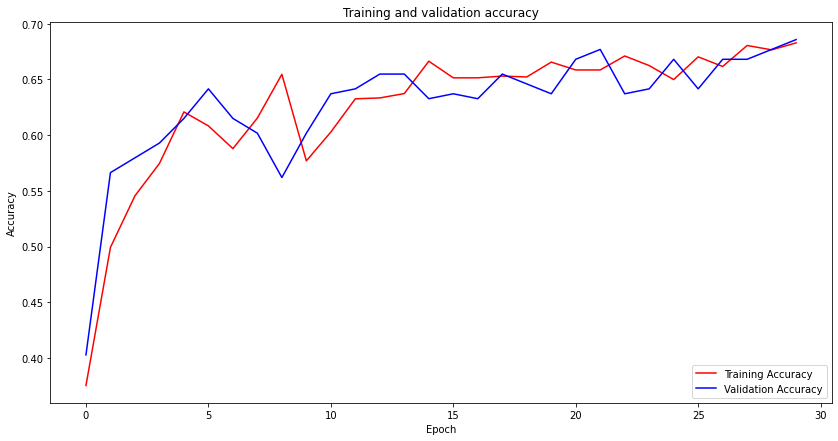

In [21]:
# lets plot to see how the trained model is performing
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

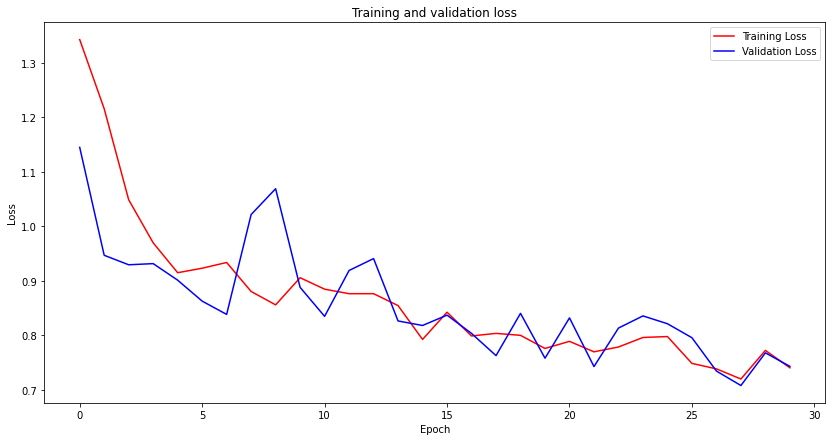

In [22]:
# plotting the loss too we realise that both are going down and down
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [25]:
# now we have trained the model and achieved about 70% of the accuracy, we are now going to validate the performance of our alien_test so we are going to pass into our model

## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

# we have to load the image into an array form
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

# Step 4. Checking performance on Test Data (Out of the sample)


In [26]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [28]:
# we are using model.predict to predict the images

array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 0s 3ms/step
[1 1 3 3 1 0 2 0 0 0 4 3 2 0 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [30]:
# we are extracting our labels here
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [33]:
# we can see our loss
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)
# hover on variable to see the loss percentage

In [34]:
# If we want to plot our confusion metrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

# we read in the dialognal. Whatever is in the diagonal of the results are read the rest is misclassified

array([[0, 2, 0, 2, 0],
       [5, 1, 2, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [35]:
# all we are doing from hence is create a more graphical representation of our confusion metrix
rain_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [36]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

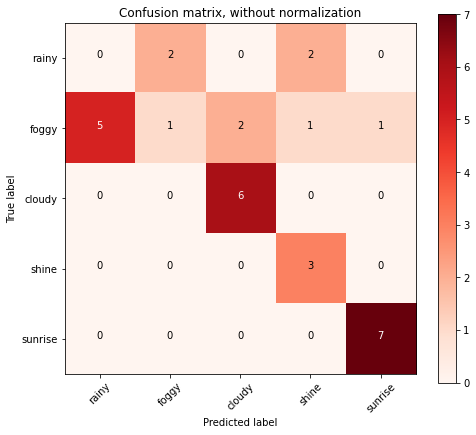

In [37]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()